In [2]:
import argparse
import mlflow
import mlflow.sklearn
import numpy
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlflow.models import infer_signature

df = pd.read_csv('../data/creditcard.csv')

In [7]:
parser = argparse.ArgumentParser()
parser.add_argument("--max_iter", type=int, default=1000)
parser.add_argument("--n_estimators", type=int, default=100)

args = parser.parse_args([])

In [5]:
X = df.drop(columns="Class")
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("creditcard_experiment_6_4")

2025/10/01 15:18:53 INFO mlflow.tracking.fluent: Experiment with name 'creditcard_experiment_6_4' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/SSAFY/mlflow_project/mlruns/3', creation_time=1759299533684, experiment_id='3', last_update_time=1759299533684, lifecycle_stage='active', name='creditcard_experiment_6_4', tags={}>

In [9]:
with mlflow.start_run(run_name="LogisticRegression"):
    model = LogisticRegression(max_iter=args.max_iter)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = precision_score(y_test, preds)

    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)

    signature = infer_signature(X_train, preds)

    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run LogisticRegression at: http://localhost:5000/#/experiments/3/runs/8221913a913c418eade077f7d8b5b185
🧪 View experiment at: http://localhost:5000/#/experiments/3


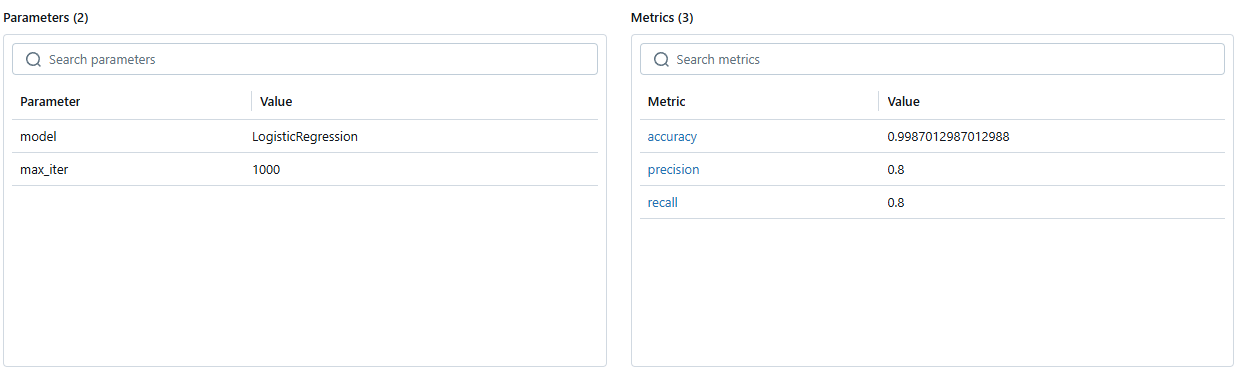

In [10]:
with mlflow.start_run(run_name="RandomForest"):
    model = RandomForestClassifier(n_estimators=args.n_estimators)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)


    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = precision_score(y_test, preds)

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)

    signature = infer_signature(X_train, preds)

    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run RandomForest at: http://localhost:5000/#/experiments/3/runs/5240fefe24da433ab63ce23c7186ada9
🧪 View experiment at: http://localhost:5000/#/experiments/3


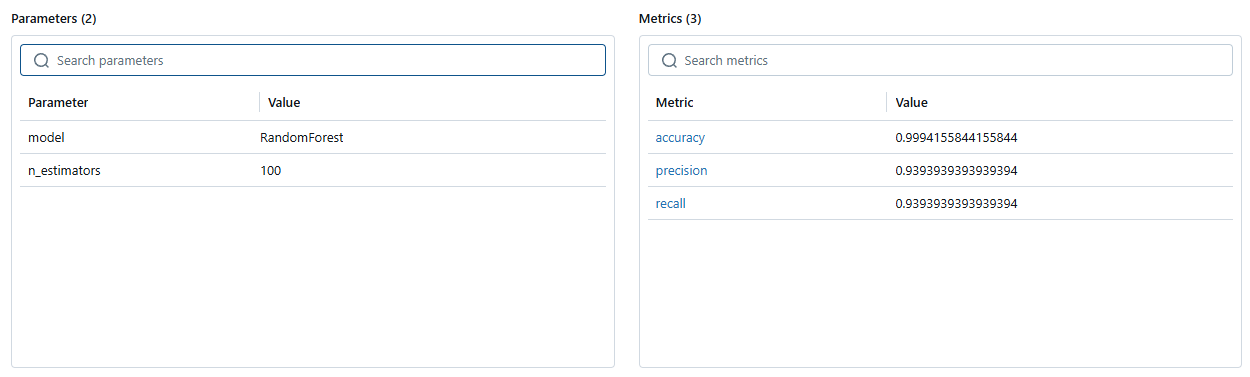